# 설명

In [1]:
# Column
# Appid, Name, Is_free, Detail_description, About_the_game, Short_description, Header_image
# Website, Pc_requirements, LegalNotice, Developers, Publishers, Price_overview, Metacritic,
# Categories, Genres, Screenshots, Movies, Relased_date, Background, Postive, Negative, Score_rank, Tags

## Detail_description or About_the_game 을 통해 자주 사용하는 keyword Hitmap 표현 - 주 표현 단어 체크
## 연도별 Categorites, Genres 를 통해 시대별 인기 장르 - 시대별 인기 장르 시각화
## Relsed_date를 통해 연도별 분리 - 각 연도별 비교
## Tags를 통해 인디 및 기존 분리 - 인디와 회사의 트렌드는 다를것
## Metacrtic - 다양한 시각
## Youtube

# 라이브러리 불러오기

In [1]:
## 구글 드라이브 연동
from google.colab import drive
# mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## 필요한 라이브러리 설치
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False


In [4]:
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드

In [5]:
# 데이터 셋 로드
import shutil
import os

src_folder = '/content/drive/MyDrive/Data/Steam'
dst_folder = '/content/steam'

shutil.copytree(src_folder, dst_folder)

'/content/steam'

In [6]:
## 데이터 로드
df_steam_store = pd.read_csv("./steam/steam_games_processed_top_500.csv")
df_youtube = pd.read_csv("./steam/youtube_review_data.csv")

In [7]:
df_youtube_test = pd.read_csv("./steam/youtube_review_data.csv")

# 전처리

In [8]:
df_steam_store.columns

Index(['appid', 'name', 'about_the_game', 'background', 'categories',
       'detailed_description', 'developers', 'genres', 'header_image',
       'is_free', 'legal_notice', 'metacritic', 'movies', 'negative', 'owners',
       'pc_requirements', 'positive', 'price_overview', 'publishers',
       'release_date', 'score_rank', 'screenshots', 'short_description',
       'tags', 'website'],
      dtype='object')

In [9]:
df_youtube.columns

Index(['Game Name', 'Video Title', 'Video ID', 'Published At', 'Views',
       'Likes', 'Comments'],
      dtype='object')

### 불필요한 컬럼 제거

In [10]:
cols_to_drop = ['appid', 'about_the_game','detailed_description','short_description','background', 'header_image', 'legal_notice', 'movies', 'screenshots', 'website']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [11]:
df_steam_store

,name,categories,developers,genres,is_free,metacritic,negative,owners,pc_requirements,positive,price_overview,publishers,release_date,score_rank,tags
0,Counter-Strike 2,"[{'id': 1, 'description': 'Multi-player'}, {'i...",['Valve'],"[{'id': '1', 'description': 'Action'}, {'id': ...",True,NaN,1173003,"100,000,000 .. 200,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,7642084,NaN,['Valve'],"{'coming_soon': False, 'date': '21 Aug, 2012'}",NaN,"{'FPS': 91172, 'Shooter': 65634, 'Multiplayer'..."
1,Grand Theft Auto V Legacy,"[{'id': 2, 'description': 'Single-player'}, {'...",['Rockstar North'],"[{'id': '1', 'description': 'Action'}, {'id': ...",False,"{'score': 96, 'url': 'https://www.metacritic.c...",250576,"50,000,000 .. 100,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,1739980,NaN,['Rockstar Games'],"{'coming_soon': False, 'date': '13 Apr, 2015'}",NaN,"{'Open World': 32676, 'Action': 23557, 'Multip..."
2,PUBG: BATTLEGROUNDS,"[{'id': 1, 'description': 'Multi-player'}, {'i...",['PUBG Corporation'],"[{'id': '1', 'description': 'Action'}, {'id': ...",True,NaN,1037487,"100,000,000 .. 200,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,1520457,NaN,"['KRAFTON, Inc.']","{'coming_soon': False, 'date': '21 Dec, 2017'}",NaN,"{'Survival': 14893, 'Shooter': 12788, 'Battle ..."
3,Terraria,"[{'id': 2, 'description': 'Single-player'}, {'...",['Re-Logic'],"[{'id': '1', 'description': 'Action'}, {'id': ...",False,"{'score': 83, 'url': 'https://www.metacritic.c...",35494,"20,000,000 .. 50,000,000","{'minimum': '<h2 class=""bb_tag""><strong>REQUIR...",1373979,"{'currency': 'USD', 'initial': 999, 'final': 4...",['Re-Logic'],"{'coming_soon': False, 'date': 'May 16, 2011'}",NaN,"{'Open World Survival Craft': 16503, 'Sandbox'..."
4,Tom Clancy's Rainbow Six® Siege X,"[{'id': 2, 'description': 'Single-player'}, {'...",['Ubisoft Montreal'],"[{'id': '1', 'description': 'Action'}, {'id': ...",True,NaN,225730,"20,000,000 .. 50,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,1172854,NaN,['Ubisoft'],"{'coming_soon': False, 'date': '1 Dec, 2015'}",NaN,"{'FPS': 9892, 'PvP': 9194, 'Multiplayer': 9103..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Wolfenstein II: The New Colossus,"[{'id': 2, 'description': 'Single-player'}, {'...",['MachineGames'],"[{'id': '1', 'description': 'Action'}]",False,"{'score': 86, 'url': 'https://www.metacritic.c...",8413,"1,000,000 .. 2,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,36084,"{'currency': 'KRW', 'initial': 4450000, 'final...",['Bethesda Softworks'],"{'coming_soon': False, 'date': '26 Oct, 2017'}",NaN,"{'FPS': 361, 'Action': 345, 'Gore': 285, 'Sing..."
486,Pacify,"[{'id': 2, 'description': 'Single-player'}, {'...",['Shawn Hitchcock'],"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,5620,"2,000,000 .. 5,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,36071,"{'currency': 'KRW', 'initial': 560000, 'final'...",['Hitchcock Games'],"{'coming_soon': False, 'date': '22 Feb, 2019'}",NaN,"{'Horror': 1835, 'Online Co-Op': 1403, 'Multip..."
487,Assetto Corsa Competizione,"[{'id': 2, 'description': 'Single-player'}, {'...",['Kunos Simulazioni'],"[{'id': '9', 'description': 'Racing'}, {'id': ...",False,"{'score': 77, 'url': 'https://www.metacritic.c...",2908,"1,000,000 .. 2,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,36035,"{'currency': 'KRW', 'initial': 4800000, 'final...",['505 Games'],"{'coming_soon': False, 'date': '29 May, 2019'}",NaN,"{'Racing': 316, 'Automobile Sim': 287, 'Simula..."
488,Watch_Dogs™,"[{'id': 2, 'description': 'Single-player'}, {'...",['Ubisoft'],"[{'id': '1', 'description': 'Action'}, {'id': ...",False,"{'score': 77, 'url': 'https://www.metacritic.c...",9953,"1,000,000 .. 2,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,35770,"{'currency': 'KRW', 'initial': 2240000, 'final...",['Ubisoft'],"{'coming_soon': False, 'date': '26 May, 2014'}",NaN,"{'Open World': 4351, 'Hacking': 3453, 'Act

In [12]:
df_steam_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             490 non-null    object 
 1   categories       489 non-null    object 
 2   developers       490 non-null    object 
 3   genres           488 non-null    object 
 4   is_free          490 non-null    bool   
 5   metacritic       292 non-null    object 
 6   negative         490 non-null    int64  
 7   owners           490 non-null    object 
 8   pc_requirements  490 non-null    object 
 9   positive         490 non-null    int64  
 10  price_overview   408 non-null    object 
 11  publishers       489 non-null    object 
 12  release_date     490 non-null    object 
 13  score_rank       0 non-null      float64
 14  tags             490 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 54.2+ KB


In [13]:
cols_to_drop = ['Video Title', 'Video ID', 'Published At']
df_youtube = df_youtube.drop(cols_to_drop, axis=1)

In [14]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Game Name  990 non-null    object
 1   Views      990 non-null    int64 
 2   Likes      990 non-null    int64 
 3   Comments   990 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 31.1+ KB


In [15]:
df_youtube.head()

,Game Name,Views,Likes,Comments
0,Counter-Strike: Global Offensive,329863,2220,838
1,Counter-Strike: Global Offensive,802933,73752,1450
2,Counter-Strike: Global Offensive,58758,490,105
3,Counter-Strike: Global Offensive,153010,1242,1518
4,Counter-Strike: Global Offensive,3833293,61455,2455


### 'release_date' 컬럼 'yyyy-mm'으로 포맷팅

In [16]:
# 그룹화하여 합계 집계
df_youtube_sum = df_youtube.groupby('Game Name', as_index=False).agg({
    'Views': 'sum',
    'Likes': 'sum',
    'Comments': 'sum'
})

# 결과 확인
print(df_youtube_sum.head())

               Game Name    Views   Likes  Comments
0          7 Days to Die  1287747   21656      4039
1  ARK: Survival Evolved  3342214   51158     10331
2               Among Us  4977276  166078      4526
3           Apex Legends  3574041  101563     15881
4                 Arma 3  6014688  161098      5756


In [17]:
# -*- coding: utf-8 -*-
import pandas as pd
import ast
from datetime import datetime




# 'Release_date' 컬럼의 데이터 구조를 파악하고 'yyyy-mm' 형태로 전처리하는 함수
def format_release_date(date_str):
    """
    'Release_date' 컬럼의 문자열 데이터를 파싱하여 'yyyy-mm' 형식으로 변환합니다.
    컬럼의 데이터는 "{'coming_soon': False, 'date': '21 Dec, 2017'}"와 같은
    딕셔너리 형태의 문자열로 구성되어 있습니다.

    Args:
        date_str (str): 'Release_date' 컬럼의 원본 문자열.

    Returns:
        str: 'yyyy-mm' 형식으로 변환된 날짜 문자열. 파싱에 실패하면 None을 반환합니다.
    """
    # NaN 값이나 비어있는 문자열 등의 예외 처리
    if pd.isna(date_str):
        return None

    try:
        # ast.literal_eval을 사용하여 문자열을 파이썬 딕셔너리로 안전하게 변환
        date_dict = ast.literal_eval(date_str)

        # 'date' 키를 사용하여 날짜 정보를 추출
        date_info = date_dict.get('date')

        if date_info:
            # 날짜 형식은 '21 Dec, 2017' 또는 'Dec 21, 2017' 등 다양할 수 있습니다.
            # 여러 일반적인 날짜 형식을 시도하여 파싱합니다.
            date_formats = ('%d %b, %Y', '%b %d, %Y', '%Y, %b %d')
            dt_object = None
            for fmt in date_formats:
                try:
                    # 문자열에서 공백을 제거하여 안정성을 높입니다.
                    dt_object = datetime.strptime(date_info.strip(), fmt)
                    break # 성공적으로 파싱되면 루프를 중단합니다.
                except ValueError:
                    continue

            if dt_object:
                # datetime 객체를 'yyyy-mm' 형식의 문자열로 변환하여 반환
                return dt_object.strftime('%Y-%m')
            else:
                # 알려진 형식으로 파싱되지 않은 경우
                return None
        else:
            # 'date' 키가 없는 경우
            return None

    except (ValueError, SyntaxError):
        # ast.literal_eval에서 오류가 발생하거나(잘못된 딕셔너리 형식)
        # strptime에서 날짜 형식 변환에 실패한 경우
        return None

# 'Release_date' 컬럼에 위에서 정의한 함수를 적용하여 'release_yyyy_mm'라는 새 컬럼을 생성합니다.
df_steam_store['release_yyyy_mm'] = df_steam_store['release_date'].apply(format_release_date)

# 결과 확인을 위해 원본 컬럼과 전처리된 컬럼의 일부를 출력합니다.
print("데이터 전처리 전후 비교 (상위 10개):")
print(df_steam_store[['name', 'release_date', 'release_yyyy_mm']].head(10))

# 전처리 후 결측치 확인
print("\n'release_yyyy_mm' 컬럼의 결측치 개수:", df_steam_store['release_yyyy_mm'].isnull().sum())



데이터 전처리 전후 비교 (상위 10개):
                                name  \
0                   Counter-Strike 2   
1          Grand Theft Auto V Legacy   
2                PUBG: BATTLEGROUNDS   
3                           Terraria   
4  Tom Clancy's Rainbow Six® Siege X   
5                        Garry's Mod   
6                 Black Myth: Wukong   
7                               Rust   
8                    Team Fortress 2   
9                         ELDEN RING   

                                        release_date release_yyyy_mm  
0     {'coming_soon': False, 'date': '21 Aug, 2012'}         2012-08  
1     {'coming_soon': False, 'date': '13 Apr, 2015'}         2015-04  
2     {'coming_soon': False, 'date': '21 Dec, 2017'}         2017-12  
3     {'coming_soon': False, 'date': 'May 16, 2011'}         2011-05  
4      {'coming_soon': False, 'date': '1 Dec, 2015'}         2015-12  
5  {'coming_soon': False, 'date': '29 ноя. 2006 г.'}            None  
6      {'coming_soon': False, 'date': 

In [18]:
df_steam_store.dropna(subset=['release_yyyy_mm'], inplace=True)
print("\n'release_yyyy_mm' 컬럼의 결측치 개수:", df_steam_store['release_yyyy_mm'].isnull().sum())


'release_yyyy_mm' 컬럼의 결측치 개수: 0


* 전처리한 컬럼인 'release_yyyy_mm' 추가 후
불필요한 원본 컬럼 'release_date' 제거  

In [19]:
cols_to_drop = ['release_date']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [20]:
df_steam_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 489
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             479 non-null    object 
 1   categories       478 non-null    object 
 2   developers       479 non-null    object 
 3   genres           477 non-null    object 
 4   is_free          479 non-null    bool   
 5   metacritic       286 non-null    object 
 6   negative         479 non-null    int64  
 7   owners           479 non-null    object 
 8   pc_requirements  479 non-null    object 
 9   positive         479 non-null    int64  
 10  price_overview   398 non-null    object 
 11  publishers       478 non-null    object 
 12  score_rank       0 non-null      float64
 13  tags             479 non-null    object 
 14  release_yyyy_mm  479 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 56.6+ KB


### 'categories' 컬럼 전처리


*   category_descriptions - 불필요한 'id' 값 제거

In [21]:
def extract_category_descriptions(category_data):
    try:
        # 문자열이면 파싱
        if isinstance(category_data, str):
            category_data = ast.literal_eval(category_data)
        # None, NaN, float 등은 무시
        if not isinstance(category_data, list):
            return []

        return [entry['description'] for entry in category_data if isinstance(entry, dict) and 'description' in entry]
    except Exception as e:
        print(f"오류 발생: {e}")
        return []

# 새 컬럼으로 저장
df_steam_store['category_descriptions'] = df_steam_store['categories'].apply(extract_category_descriptions)

# 확인
print(df_steam_store[['category_descriptions']].head())


                               category_descriptions
0  [Multi-player, Cross-Platform Multiplayer, Ste...
1  [Single-player, Multi-player, PvP, Online PvP,...
2  [Multi-player, PvP, Online PvP, Stats, Remote ...
3  [Single-player, Multi-player, PvP, Online PvP,...
4  [Single-player, Multi-player, PvP, Online PvP,...


### 'genres' 컬럼 전처리


*   genre_descriptions - 불필요한 'id' 값 제거

In [22]:
def extract_genre_descriptions(genre_data):
    try:
        # 문자열이라면 파싱
        if isinstance(genre_data, str):
            genre_data = ast.literal_eval(genre_data)
        # None, NaN, float 등은 무시
        if not isinstance(genre_data, list):
            return []

        return [entry['description'] for entry in genre_data if isinstance(entry, dict) and 'description' in entry]
    except Exception as e:
        print(f"오류 발생: {e}")
        return []
df_steam_store['genre_descriptions'] = df_steam_store['genres'].apply(extract_genre_descriptions)

# 확인
print(df_steam_store[['genres', 'genre_descriptions']].head())

                                              genres  \
0  [{'id': '1', 'description': 'Action'}, {'id': ...   
1  [{'id': '1', 'description': 'Action'}, {'id': ...   
2  [{'id': '1', 'description': 'Action'}, {'id': ...   
3  [{'id': '1', 'description': 'Action'}, {'id': ...   
4  [{'id': '1', 'description': 'Action'}, {'id': ...   

                                  genre_descriptions  
0                             [Action, Free To Play]  
1                                [Action, Adventure]  
2  [Action, Adventure, Massively Multiplayer, Fre...  
3                    [Action, Adventure, Indie, RPG]  
4                             [Action, Free To Play]  


### 'metacritic' 컬럼 전처리


*   metacritic_score - 메타크리틱 점수, 불필요한 'url' 값 제거

메타크리틱이란?

영화, 음악, 게임 등 미디어들을 비평 후 점수로 남기는 단체


In [23]:
def extract_metacritic_score(meta_data):
    try:
        # 문자열이면 파싱
        if isinstance(meta_data, str):
            meta_data = ast.literal_eval(meta_data)
        # 딕셔너리이고 'score' 키가 있으면 반환
        if isinstance(meta_data, dict) and 'score' in meta_data:
            return meta_data['score']
        return None
    except Exception as e:
        print(f"오류 발생: {e}")
        return None
df_steam_store['metacritic_score'] = df_steam_store['metacritic'].apply(extract_metacritic_score)

# 상위 몇 개 확인
print(df_steam_store[['metacritic_score']].head())

   metacritic_score
0               NaN
1              96.0
2               NaN
3              83.0
4               NaN


### 'price_overview' 컬럼 전처리


*   price_initial - 기존가격
*   price_final - 할인가격
*   discount_percent - 할인비율



In [24]:
def extract_price_info(price_data):
    try:
        # 문자열이면 파싱
        if isinstance(price_data, str):
            price_data = ast.literal_eval(price_data)
        if not isinstance(price_data, dict):
            return None, None, None

        initial_price = price_data.get('initial', 0) / 100
        final_price = price_data.get('final', 0) / 100
        discount = price_data.get('discount_percent', 0)
        return initial_price, final_price, discount
    except Exception as e:
        print(f"오류 발생: {e}")
        return None, None, None
df_steam_store[['price_initial', 'price_final', 'discount_percent']] = df_steam_store['price_overview'].apply(extract_price_info).apply(pd.Series)

# 확인
print(df_steam_store[['price_initial', 'price_final', 'discount_percent']].head())

   price_initial  price_final  discount_percent
0            NaN          NaN               NaN
1            NaN          NaN               NaN
2            NaN          NaN               NaN
3           9.99         4.99              50.0
4            NaN          NaN               NaN


### 'tags' 컬럼 전처리


*   tags_list - 각 태그 값

In [25]:
def extract_tags_list(tag_data):
    try:
        # 문자열이면 안전하게 파싱
        if isinstance(tag_data, str):
            tag_data = ast.literal_eval(tag_data)
        if not isinstance(tag_data, dict):
            return []

        return list(tag_data.keys())  # 점수 제외하고 태그만 리스트로 추출
    except Exception as e:
        print(f"오류 발생: {e}")
        return []
df_steam_store['tags_list'] = df_steam_store['tags'].apply(extract_tags_list)

# 확인
print(df_steam_store[['tags', 'tags_list']].head())

                                                tags  \
0  {'FPS': 91172, 'Shooter': 65634, 'Multiplayer'...   
1  {'Open World': 32676, 'Action': 23557, 'Multip...   
2  {'Survival': 14893, 'Shooter': 12788, 'Battle ...   
3  {'Open World Survival Craft': 16503, 'Sandbox'...   
4  {'FPS': 9892, 'PvP': 9194, 'Multiplayer': 9103...   

                                           tags_list  
0  [FPS, Shooter, Multiplayer, Competitive, Actio...  
1  [Open World, Action, Multiplayer, Crime, Autom...  
2  [Survival, Shooter, Battle Royale, Multiplayer...  
3  [Open World Survival Craft, Sandbox, Survival,...  
4  [FPS, PvP, Multiplayer, Tactical, e-sports, Sh...  


In [26]:
cols_to_drop = ['categories', 'genres', 'metacritic', 'price_overview', 'tags']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [27]:
df_steam_store.head()

,name,developers,is_free,negative,owners,pc_requirements,positive,publishers,score_rank,release_yyyy_mm,category_descriptions,genre_descriptions,metacritic_score,price_initial,price_final,discount_percent,tags_list
0,Counter-Strike 2,['Valve'],True,1173003,"100,000,000 .. 200,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,7642084,['Valve'],NaN,2012-08,"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free To Play]",NaN,NaN,NaN,NaN,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
1,Grand Theft Auto V Legacy,['Rockstar North'],False,250576,"50,000,000 .. 100,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,1739980,['Rockstar Games'],NaN,2015-04,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure]",96.0,NaN,NaN,NaN,"[Open World, Action, Multiplayer, Crime, Autom..."
2,PUBG: BATTLEGROUNDS,['PUBG Corporation'],True,1037487,"100,000,000 .. 200,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,1520457,"['KRAFTON, Inc.']",NaN,2017-12,"[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...",NaN,NaN,NaN,NaN,"[Survival, Shooter, Battle Royale, Multiplayer..."
3,Terraria,['Re-Logic'],False,35494,"20,000,000 .. 50,000,000","{'minimum': '<h2 class=""bb_tag""><strong>REQUIR...",1373979,['Re-Logic'],NaN,2011-05,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, Indie, RPG]",83.0,9.99,4.99,50.0,"[Open World Survival Craft, Sandbox, Survival,..."
4,Tom Clancy's Rainbow Six® Siege X,['Ubisoft Montreal'],True,225730,"20,000,000 .. 50,000,000",{'minimum': '<strong>Minimum:</strong><br><ul ...,1172854,['Ubisoft'],NaN,2015-12,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Free To Play]",NaN,NaN,NaN,NaN,"[FPS, PvP, Multiplayer, Tactical, e-sports, Sh..."


In [28]:
cols_to_drop = ['pc_requirements']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [29]:
df_steam_store.head()

,name,developers,is_free,negative,owners,positive,publishers,score_rank,release_yyyy_mm,category_descriptions,genre_descriptions,metacritic_score,price_initial,price_final,discount_percent,tags_list
0,Counter-Strike 2,['Valve'],True,1173003,"100,000,000 .. 200,000,000",7642084,['Valve'],NaN,2012-08,"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free To Play]",NaN,NaN,NaN,NaN,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
1,Grand Theft Auto V Legacy,['Rockstar North'],False,250576,"50,000,000 .. 100,000,000",1739980,['Rockstar Games'],NaN,2015-04,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure]",96.0,NaN,NaN,NaN,"[Open World, Action, Multiplayer, Crime, Autom..."
2,PUBG: BATTLEGROUNDS,['PUBG Corporation'],True,1037487,"100,000,000 .. 200,000,000",1520457,"['KRAFTON, Inc.']",NaN,2017-12,"[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...",NaN,NaN,NaN,NaN,"[Survival, Shooter, Battle Royale, Multiplayer..."
3,Terraria,['Re-Logic'],False,35494,"20,000,000 .. 50,000,000",1373979,['Re-Logic'],NaN,2011-05,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, Indie, RPG]",83.0,9.99,4.99,50.0,"[Open World Survival Craft, Sandbox, Survival,..."
4,Tom Clancy's Rainbow Six® Siege X,['Ubisoft Montreal'],True,225730,"20,000,000 .. 50,000,000",1172854,['Ubisoft'],NaN,2015-12,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Free To Play]",NaN,NaN,NaN,NaN,"[FPS, PvP, Multiplayer, Tactical, e-sports, Sh..."


In [30]:
print("\n 결측치 개수:", df_steam_store['metacritic_score'].isnull().sum())
print("\n 결측치 개수:", df_steam_store['price_initial'].isnull().sum())
print("\n 결측치 개수:", df_steam_store['price_final'].isnull().sum())
print("\n 결측치 개수:", df_steam_store['discount_percent'].isnull().sum())


 결측치 개수: 193

 결측치 개수: 81

 결측치 개수: 81

 결측치 개수: 81


In [31]:
cols_to_drop = ['metacritic_score', 'price_initial', 'price_final', 'discount_percent', 'score_rank']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [32]:
df_steam_store.isnull().sum()

,0
name,0
developers,0
is_free,0
negative,0
owners,0
positive,0
publishers,1
release_yyyy_mm,0
category_descriptions,0
genre_descriptions,0


In [33]:
import ast

df_steam_store = df_steam_store[df_steam_store['publishers'].notna()]
df_steam_store['release_yyyy_mm'] = pd.to_datetime(df_steam_store['release_yyyy_mm'], format='%Y-%m')

In [34]:
df_steam_store['name'] = df_steam_store['name'].astype('str')

In [35]:
df_steam_store.head()

,name,developers,is_free,negative,owners,positive,publishers,release_yyyy_mm,category_descriptions,genre_descriptions,tags_list
0,Counter-Strike 2,['Valve'],True,1173003,"100,000,000 .. 200,000,000",7642084,['Valve'],2012-08-01,"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free To Play]","[FPS, Shooter, Multiplayer, Competitive, Actio..."
1,Grand Theft Auto V Legacy,['Rockstar North'],False,250576,"50,000,000 .. 100,000,000",1739980,['Rockstar Games'],2015-04-01,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure]","[Open World, Action, Multiplayer, Crime, Autom..."
2,PUBG: BATTLEGROUNDS,['PUBG Corporation'],True,1037487,"100,000,000 .. 200,000,000",1520457,"['KRAFTON, Inc.']",2017-12-01,"[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...","[Survival, Shooter, Battle Royale, Multiplayer..."
3,Terraria,['Re-Logic'],False,35494,"20,000,000 .. 50,000,000",1373979,['Re-Logic'],2011-05-01,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, Indie, RPG]","[Open World Survival Craft, Sandbox, Survival,..."
4,Tom Clancy's Rainbow Six® Siege X,['Ubisoft Montreal'],True,225730,"20,000,000 .. 50,000,000",1172854,['Ubisoft'],2015-12-01,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Free To Play]","[FPS, PvP, Multiplayer, Tactical, e-sports, Sh..."


In [51]:
import pandas as pd

# owners 컬럼 전처리 함수 정의
def parse_owners_range(owners_str):
    try:
        # 공백 제거 후 '..' 기준으로 분리
        parts = owners_str.replace(' ', '').split('..')
        if len(parts) == 2:
            low = int(parts[0].replace(',', ''))
            high = int(parts[1].replace(',', ''))
            return int((low + high) / 2)
        else:
            return None
    except Exception as e:
        print(f"에러: {owners_str} → {e}")
        return None

# 전처리 수행 (새로운 컬럼에 저장)
df_steam_store['owners_avg'] = df_steam_store['owners'].apply(parse_owners_range)

# 결과 확인
print(df_steam_store[['owners', 'owners_avg']].head())


                       owners  owners_avg
0  100,000,000 .. 200,000,000   150000000
1   50,000,000 .. 100,000,000    75000000
2  100,000,000 .. 200,000,000   150000000
3    20,000,000 .. 50,000,000    35000000
4    20,000,000 .. 50,000,000    35000000


In [52]:
cols_to_drop = ['owners']
df_steam_store = df_steam_store.drop(cols_to_drop, axis=1)

In [53]:
df_steam_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 489
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   478 non-null    object        
 1   developers             478 non-null    object        
 2   is_free                478 non-null    bool          
 3   negative               478 non-null    int64         
 4   positive               478 non-null    int64         
 5   publishers             478 non-null    object        
 6   release_yyyy_mm        478 non-null    datetime64[ns]
 7   category_descriptions  478 non-null    object        
 8   genre_descriptions     478 non-null    object        
 9   tags_list              478 non-null    object        
 10  owners_avg             478 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 57.7+ KB


In [37]:
df_youtube_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Game Name  99 non-null     object
 1   Views      99 non-null     int64 
 2   Likes      99 non-null     int64 
 3   Comments   99 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [54]:
# 유튜브 및 스팀 상점 데이터 병합
df_merged = pd.merge(df_steam_store, df_youtube_sum, left_on='name', right_on='Game Name')

In [55]:
df_merged.head()

,name,developers,is_free,negative,positive,publishers,release_yyyy_mm,category_descriptions,genre_descriptions,tags_list,owners_avg,Game Name,Views,Likes,Comments
0,Grand Theft Auto V Legacy,['Rockstar North'],False,250576,1739980,['Rockstar Games'],2015-04-01,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure]","[Open World, Action, Multiplayer, Crime, Autom...",75000000,Grand Theft Auto V Legacy,4123142,88526,9922
1,PUBG: BATTLEGROUNDS,['PUBG Corporation'],True,1037487,1520457,"['KRAFTON, Inc.']",2017-12-01,"[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...","[Survival, Shooter, Battle Royale, Multiplayer...",150000000,PUBG: BATTLEGROUNDS,4929503,133979,10908
2,Terraria,['Re-Logic'],False,35494,1373979,['Re-Logic'],2011-05-01,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, Indie, RPG]","[Open World Survival Craft, Sandbox, Survival,...",35000000,Terraria,9172772,272214,32450
3,Rust,['Facepunch Studios'],False,156649,1071135,['Facepunch Studios'],2018-02-01,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Indie, Massively Multiplay...","[Survival, Crafting, Multiplayer, Open World, ...",35000000,Rust,1836202,21524,2240
4,Team Fortress 2,['Valve'],True,117208,1044264,['Valve'],2007-10-01,"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free To Play]","[Free to Play, Hero Shooter, Multiplayer, FPS,...",75000000,Team Fortress 2,4180695,151633,10739


In [56]:
# 저장 경로 설정 (예: 내 드라이브 > steam_data 폴더)
save_path_1 = '/content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_top_500.csv'
save_path_2 = '/content/drive/MyDrive/Data/Steam/Preprocessing/df_youtube_sum_top_500.csv'
save_path_3 = '/content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_youtube_merged.csv'
# CSV 저장
df_steam_store.to_csv(save_path_1, index=False)
df_youtube_sum.to_csv(save_path_2, index=False)
df_merged.to_csv(save_path_3, index=False)
print(f"✅ 저장 완료: {save_path_1}")
print(f"✅ 저장 완료: {save_path_2}")
print(f"✅ 저장 완료: {save_path_3}")

✅ 저장 완료: /content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_top_500.csv
✅ 저장 완료: /content/drive/MyDrive/Data/Steam/Preprocessing/df_youtube_sum_top_500.csv
✅ 저장 완료: /content/drive/MyDrive/Data/Steam/Preprocessing/df_steam_youtube_merged.csv


# 데이터 시각화

## 상위 20개 게임의 긍정적 리뷰 산점도

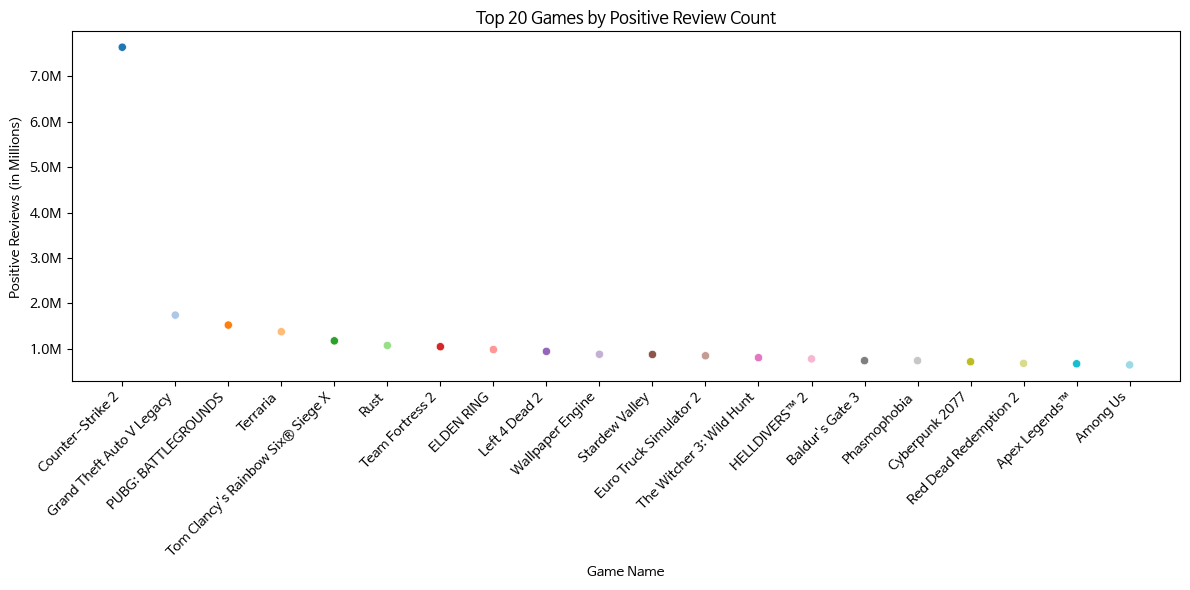

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 상위 20개 게임만 추출
top_games = df_steam_store.sort_values(by='positive', ascending=False).head(20)

plt.figure(figsize=(12, 6))

# 산점도 (게임별 색상 지정, 범례 제거)
sns.scatterplot(data=top_games, x='name', y='positive', hue='name', palette='tab20', legend=False)

# y축: 100만 단위 포맷
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 시각화 세부 설정
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Name')
plt.ylabel('Positive Reviews (in Millions)')
plt.title('Top 20 Games by Positive Review Count')
plt.tight_layout()
plt.show()


# 결과
*  긍정적인 리뷰수는 카운터-스트라이크2가 7,642,084	으로 압도적으로 많이 기록하였다
*  평균 :1,000,000 ~ 2,000,000


## 상위 20개 게임의 판매수 산점도

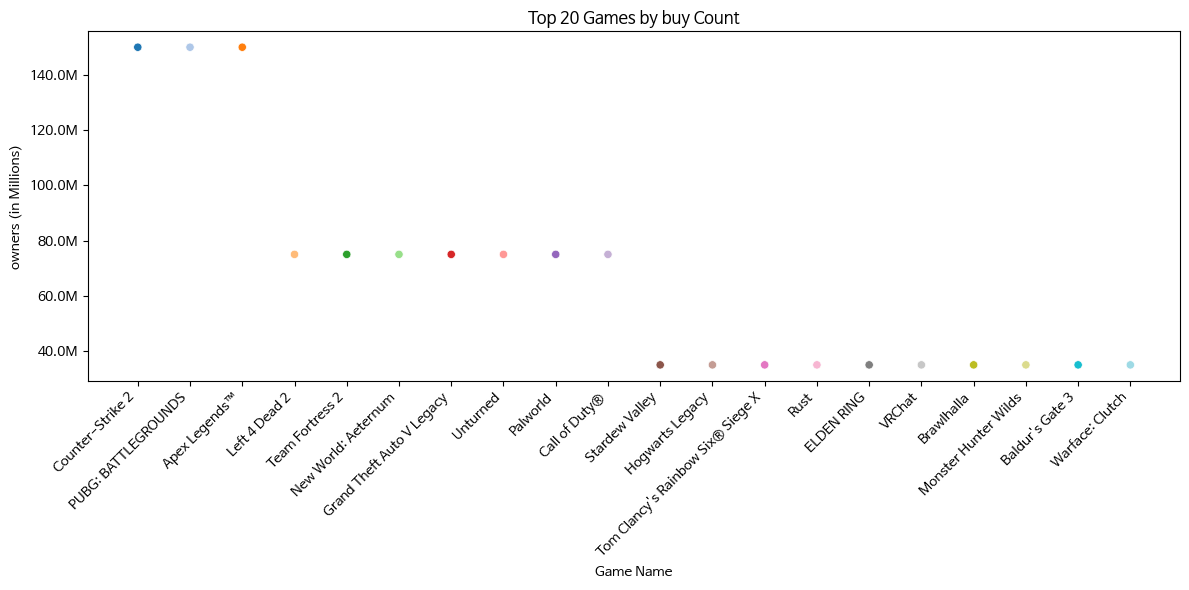

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 상위 20개 게임만 추출
top_games = df_steam_store.sort_values(by='owners_avg', ascending=False).head(20)

plt.figure(figsize=(12, 6))

# 산점도 (게임별 색상 지정, 범례 제거)
sns.scatterplot(data=top_games, x='name', y='owners_avg', hue='name', palette='tab20', legend=False)

# y축: 100만 단위 포맷
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 시각화 세부 설정
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Name')
plt.ylabel('owners (in Millions)')
plt.title('Top 20 Games by buy Count')
plt.tight_layout()
plt.show()


In [59]:
owners_mean = df_steam_store['owners_avg'].mean()
print(f"owners_avg 컬럼의 평균: {owners_mean:.0f}")


owners_avg 컬럼의 평균: 8740586


# 결과
*  판매수는 카운터-스트라이크2, 배틀그라운드, 에이팩스 레전드가 150,000,000	으로 압도적으로 많이 기록하였다
*  평균 : 874,058,6

## 상위 20개 게임의 부정적 리뷰 산점도

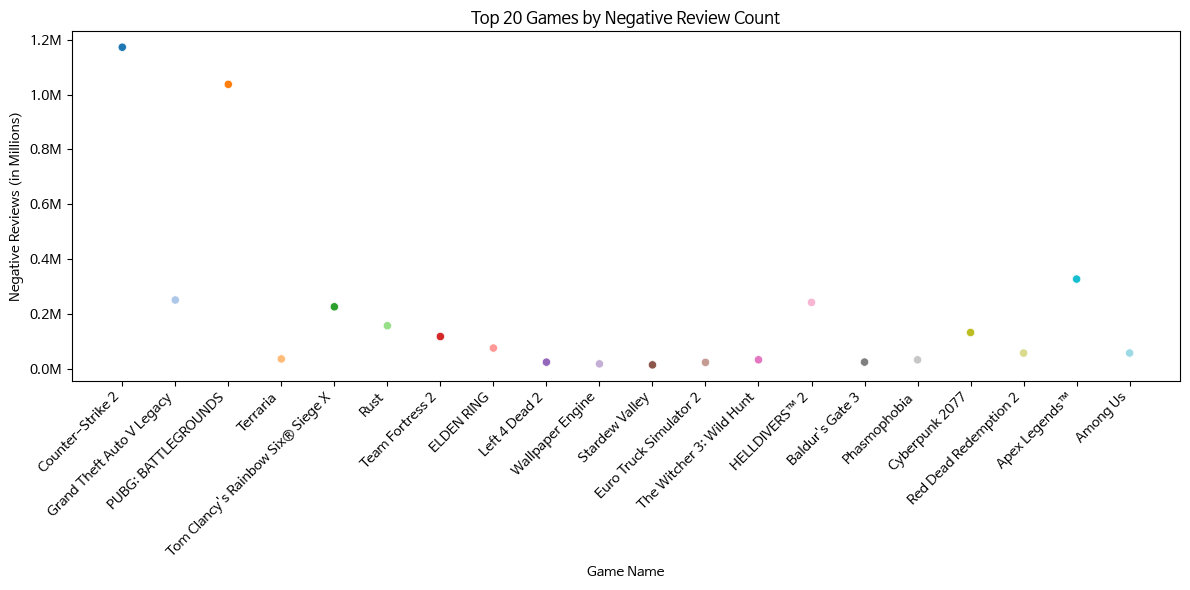

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 상위 20개 게임만 추출
top_games = df_steam_store.sort_values(by='positive', ascending=False).head(20)

plt.figure(figsize=(12, 6))

# 산점도 (게임별 색상 지정, 범례 제거)
sns.scatterplot(data=top_games, x='name', y='negative', hue='name', palette='tab20', legend=False)

# y축: 100만 단위 포맷
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 시각화 세부 설정
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Name')
plt.ylabel('Negative Reviews (in Millions)')
plt.title('Top 20 Games by Negative Review Count')
plt.tight_layout()
plt.show()

# 결과
*  부정적인 리뷰수는 카운터-스트라이크2 및 GTA 5가 100,000,0 ~ 120,000,0 으로 가장 많이 기록하였다
*  평균 :10,000 ~ 20,000,0

## 게임의 흥행과 유튜브와의 관계 - 산점도

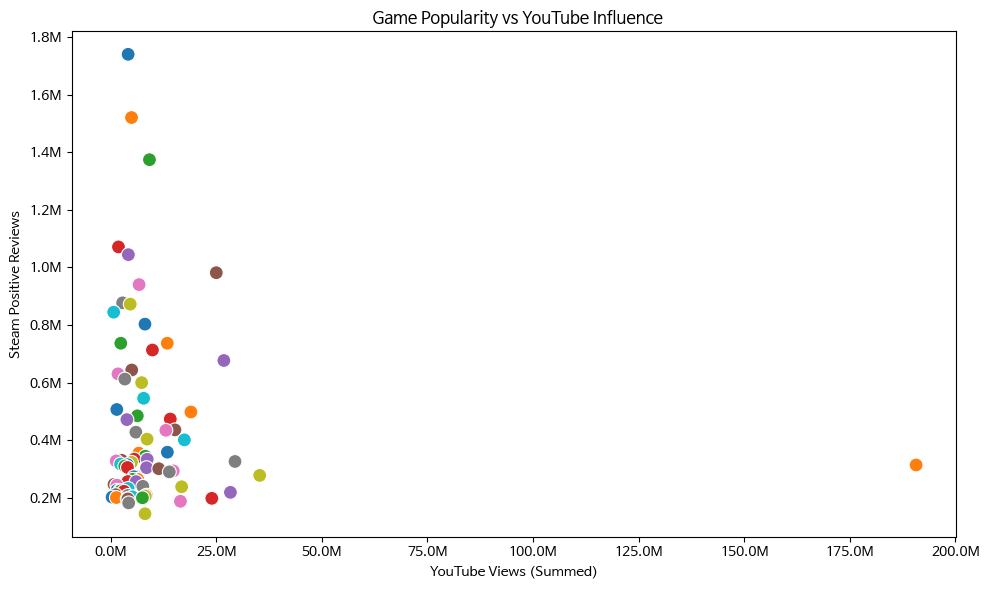

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))

# 산점도: 유튜브 조회수 vs 스팀 긍정 리뷰 수
sns.scatterplot(
    data=df_merged,
    x='Views',
    y='positive',
    hue='name',
    palette='tab10',
    legend=False,
    s=100
)

# 축 단위 포맷 (백만 단위)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M'))

plt.xlabel('YouTube Views (Summed)')
plt.ylabel('Steam Positive Reviews')
plt.title('🎮 Game Popularity vs YouTube Influence')
plt.tight_layout()
plt.show()

# 결과
*  상당수의 인기 게임의 유튜브 조회수는 저조한 편
*  범위 :1,000,000 ~ 37,400,000
*  평균 :1,000,000 ~ 37,400,000

## 게임의 판매량과 유튜브와의 관계 - 산점도

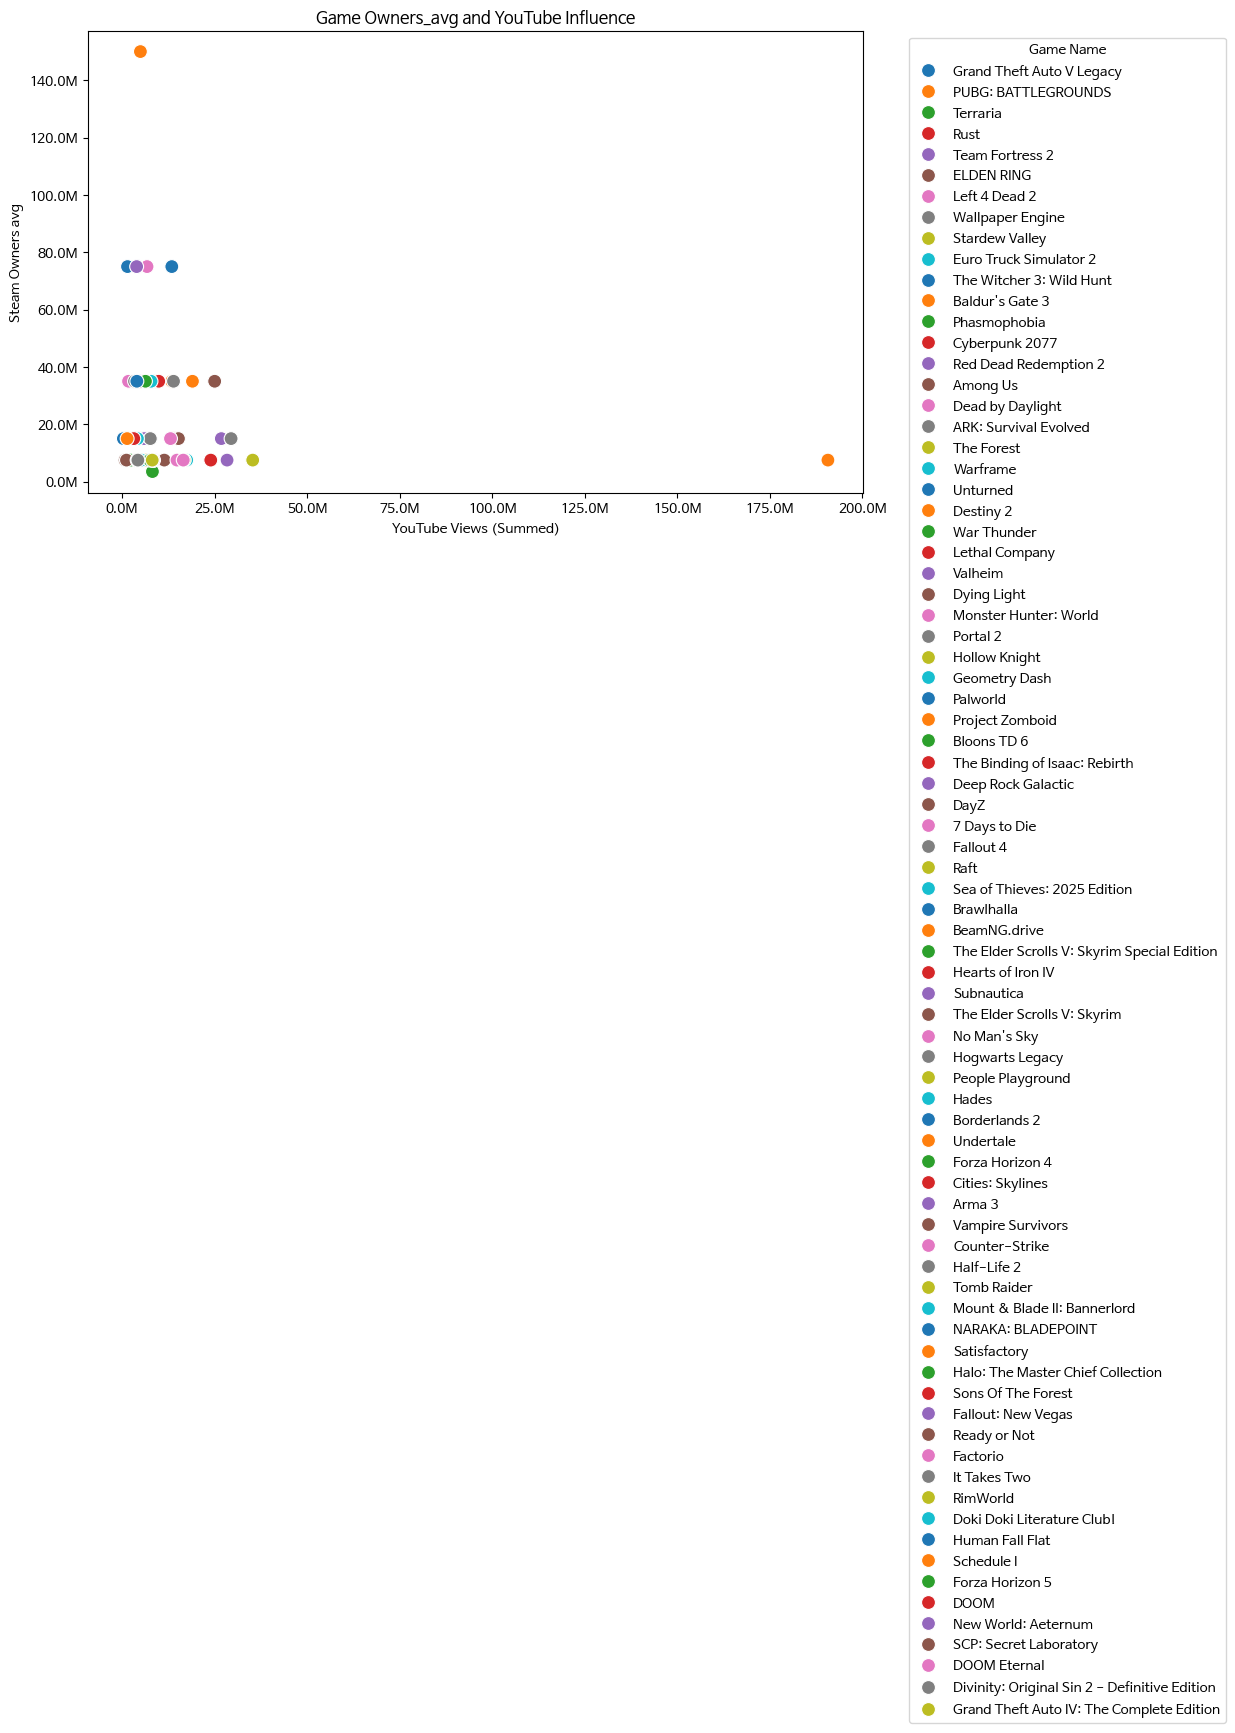

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))

# 산점도: 유튜브 조회수 vs 스팀 긍정 리뷰 수
sns.scatterplot(
    data=df_merged,
    x='Views',
    y='owners_avg',
    hue='name',
    palette='tab10',
    legend=True,
    s=100
)

# 축 단위 포맷 (백만 단위)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M'))

plt.xlabel('YouTube Views (Summed)')
plt.ylabel('Steam Owners avg')
plt.title('Game Owners_avg and YouTube Influence')

# ✅ 범례 위치 조정
plt.legend(title='Game Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [63]:
views_mean = df_youtube_sum['Views'].mean()
print(f"Views 컬럼의 평균: {views_mean:.0f}")

Views 컬럼의 평균: 9586990


# 결과
*  유튜브 조회수와 비교했을때 대부분의 게임들의 리뷰수는 대체적으로 비슷하며 가장 조회수가 많이 나온 게임의 판매량이 비교적 저조한 것을 봤을때 무조건적으로 비례하지 않다는것을 알 수 있다.
* 유튜브 상위 조회수 영상 합계 평균 : 958,699,0